In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("CarPrice_Assignment.csv")
y = X['price']
y = y.values.reshape(-1, 1)

In [3]:
#Preprocessing
X.drop(['car_ID','price'], axis=1, inplace=True)
X["doornumber"] = X["doornumber"].replace("four",4).replace("two",2)
X["cylindernumber"] = X["cylindernumber"].replace({"four": 4, "five": 5, "six": 6, "three": 3, "twelve": 12, "two": 2, "eight": 8})

X = pd.get_dummies(X, columns=['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'])
X = X.astype(float)

In [4]:
# Normalizing the features
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean(axis=0)) / y.std(axis=0)

X = np.hstack((X ,np.ones((X.shape[0],1))))

In [5]:
def gradient_descent(X, y, weights, alpha, iterations):
    m = len(X)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)
        weights -= alpha * gradient
        cost_history[i] = (1/(2*m)) * np.dot(error.T, error)
        if np.isnan(cost_history[i]):
            print(f"NaN encountered at iteration {i}")
            break
    
    return weights, cost_history

In [6]:
def linear_regression(X, y, alpha, iterations):
    weights = np.zeros((X.shape[1], 1))
    weights, cost_history = gradient_descent(X, y, weights, alpha, iterations)
    
    return weights, cost_history

In [7]:
#Train Test Split
ratio = 0.8

rows = X.shape[0]
train_size = int(ratio*rows)

X_train = X[0:train_size]
X_test = X[train_size:]

y_train = y[0:train_size]
y_test = y[train_size:]

In [8]:
alpha = 0.05
iterations = 500

weights, cost_history = linear_regression(X_train, y_train, alpha, iterations)

# print("Optimized theta parameters:", weights)
print("Final cost:", round(cost_history[-1],10))

C:\Users\Dishita\AppData\Local\Temp\ipykernel_27004\677469361.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = (1/(2*m)) * np.dot(error.T, error)


Final cost: 0.0027240527


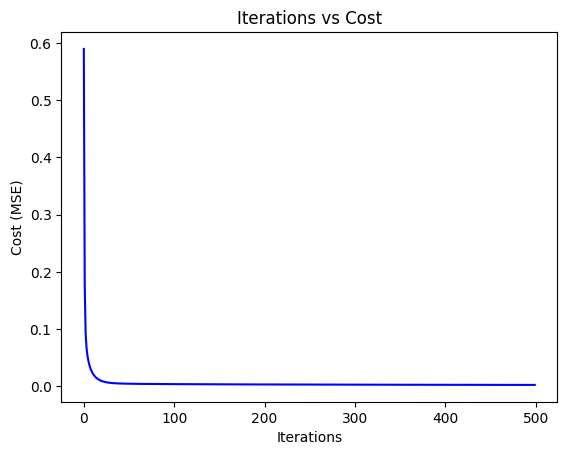

In [9]:
# Plotting the iterations vs cost
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Iterations vs Cost")
plt.show()

In [10]:
def accuracy(X_test, y_test, weights):
    y_pred = np.dot(X_test, weights)
    
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    
    mae = np.mean(np.abs(y_test - y_pred))
    
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_res = np.sum((y_test - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_total)
    
    return rmse, mae, r_squared

mse, mae, r_squared = accuracy(X_test, y_test, weights)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r_squared)


MSE: 0.46234433767698446
MAE: 0.35310969019194655
R-squared: 0.24553994022305037


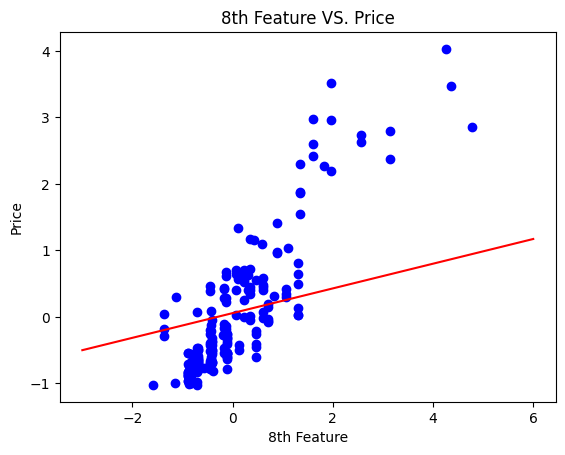

In [54]:
# Plotting feature vs. price graph for 8th feature
x_axis = np.arange(-3,7)
y_axis = weights[8] * x_axis + weights[-1]
plt.scatter(X[:,8],y, c='blue')
plt.plot(x_axis,y_axis, color = "red")
plt.xlabel("8th Feature")
plt.ylabel("Price")
plt.title("8th Feature VS. Price")
plt.show()